# <center><font color = Green>Linear Regression Model</font></center>

#### Regression Models : these models are used for predicting the target variables if they are continous type. Starting with the first regression model which is Linear Regression.

### About Dataset:

The iris(the flower)dataset attached contains five variables namely,<br>

1. SepalLength(Cm)
2. SepalWidth(Cm)
3. PetalLength(Cm)
4. PetalWidth(Cm)
5. Species

<br>
<font color ="blue">**AIM:<br>
To perform Linear Regression in python on this dataset taking Sepal Length as Response or dependent variable and rest of the variables as independent ones **</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("iris.csv")
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


** the above table describes that the data is evenly distributed as we see that the values of mean and median are close enough and also the standard deviation is almost zero (excluding Petal Length)in all the columns which means the data is close to the mean**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


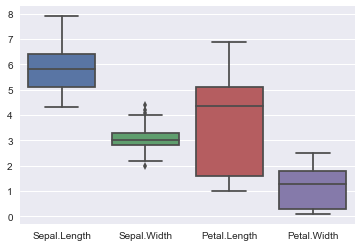

In [5]:
sns.boxplot(df) 

**Summary**
>1. there are few outliers but we will delete them.
2. we see much variation in petal length that too in lower quartile that is much values are below the value of median 
3. also, it is clearly seen that Sepal length are the lengthiest part of the iris flower andpetal width are the smallest part of iris flower.

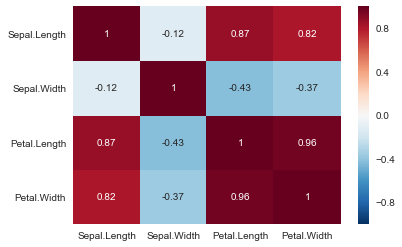

In [6]:
sns.heatmap(df.corr(),annot = True) 

** petal length, petal width are highly correlated which also means there is multicollinearility which is not good for the performance of the model hrnce we will try not to use these together when building model. lets plot pairplot ans see how they behave **

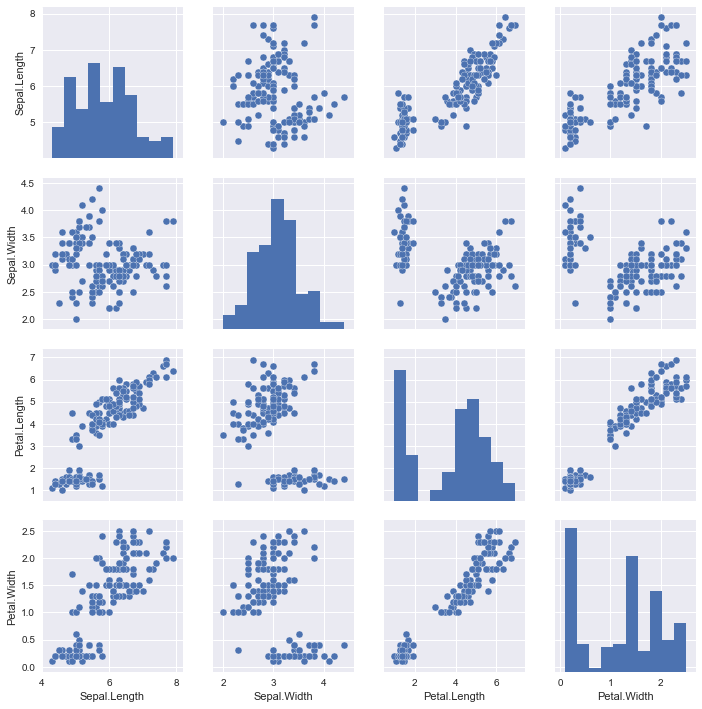

In [7]:
sns.pairplot(df)

summary : we see that petal length and petal width are linearly correlated so we can remove either one of them while building model. 

In [8]:
# first we will try modelling data only with continous variable i,e.,sepal width , petal width,petal length

In [9]:
df1 = df.copy()
df1.drop("Species",axis = 1,inplace = True)
df1.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


### Defining the target variable (y) and predictor variable(X)

In [10]:
y = df["Sepal.Length"]
X = df1
X.drop("Sepal.Length",axis = 1,inplace = True)
y.head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: Sepal.Length, dtype: float64

In [11]:
X.head(2) #these are independant variable or call them as Features

,Sepal.Width,Petal.Length,Petal.Width
0,3.5,1.4,0.2
1,3.0,1.4,0.2


## Training and splitting the variables 

In [24]:
from sklearn.model_selection import train_test_split #dividing/splitting the dataset into test data and train data

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 123)
print(X_train.shape)

(112, 3)


## Building the algorithm for the trained dataset

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
linreg = LinearRegression()
linreg.fit(X_train,y_train) #fitting the data which we have trained earlier in the linear regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
coefdf = pd.DataFrame(linreg.coef_,index=X.columns, columns= ["Coeffic"])
print(coefdf)
print("inetrcept is : ",linreg.intercept_)

               Coeffic
Sepal.Width   0.654644
Petal.Length  0.730509
Petal.Width  -0.628798
inetrcept is :  1.85171742539


# Prediction of the model

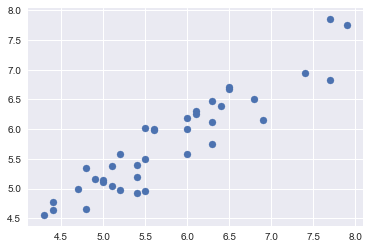

In [29]:
predict = linreg.predict(X_test)
plt.scatter(y_test,predict)

## Evaluation of the model

In [30]:
# R^2 value
r2 = metrics.r2_score(y_test,predict)
r2

0.8616861039388235

In [31]:
#now we will calculate the RMSE the root mean square of the model we have created
from sklearn import metrics
RMSE = np.sqrt(metrics.mean_squared_error(y_test,predict))
RMSE

0.34540323995656308

### removing outliers
now by removing the outlier from sepal width column, we will remove all column and row with more than value = 4.

In [32]:
df2 = df.copy()
df2.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:

df2 = df2.drop("Species",axis = 1)
df2.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [34]:
#removing outliers rows
df2 = df2[(df2["Sepal.Width"]<4)]   ##this will store only those value which satisfy given condition.
#df2[df2["Sepal.Width"]>4]
y1 = df2["Sepal.Length"]
df2 = df2.drop("Sepal.Length",axis = 1)
x1 = df2

In [35]:
x1.head(2)

,Sepal.Width,Petal.Length,Petal.Width
0,3.5,1.4,0.2
1,3.0,1.4,0.2


In [36]:
#now the variables are trained we will split the data and variables
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [37]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,random_state = 123)

In [38]:
ln = LinearRegression()
ln.fit(x1_train,y1_train)  ## to find the pattern in the dataset

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
q = pd.DataFrame(ln.coef_,index= x1.columns,columns=["coeffi"])
q

,coeffi
Sepal.Width,0.647762
Petal.Length,0.840237
Petal.Width,-0.869675


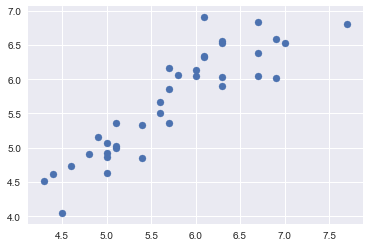

In [40]:
##now we will predict the variable
predict2 = ln.predict(x1_test)
plt.scatter(y1_test,predict2)

In [41]:
#now evaluating the model by calculating R2 and RMSE
rr2 = metrics.r2_score(y1_test,predict2)
rr2

0.79996336792477685

In [42]:
#rmse
rmse2 = np.sqrt(metrics.mean_squared_error(y1_test,predict2))
rmse2

0.36504440799723614

**since the value of r2 is lower and rmse2 is greater compared with the above model so we discard this model.**

### Model building after feature engineering (dummy encoding)

In [43]:
########################## Considering the SPECIES column as is is categorical variable so we need to do dummy encoding
############## we need to create k-1 variable and concatenate it with df

In [60]:
df3 = df.copy()
df3.head(1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa


In [61]:
df3 = pd.get_dummies(df3,drop_first=True)
df3.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_versicolor,Species_virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0


In [62]:
#df4.iloc[0:0]
#df4.drop(df4.index,inplace = True)
#df4.drop(df.columns,axis = 1,inplace=True)

In [63]:
y2 = df3["Sepal.Length"]
df3 = df3.drop("Sepal.Length",axis = 1)
x2 = df3
x2.head(3)

,Sepal.Width,Petal.Length,Petal.Width,Species_versicolor,Species_virginica
0,3.5,1.4,0.2,0,0
1,3.0,1.4,0.2,0,0
2,3.2,1.3,0.2,0,0


In [64]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,random_state=123)
lm = LinearRegression()
lm.fit(x2_train,y2_train)    

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
d = pd.DataFrame(lm.coef_,index=x2.columns,columns=["coeff"])
d

,coeff
Sepal.Width,0.517650
Petal.Length,0.833226
Petal.Width,-0.396860
Species_versicolor,-0.635727
Species_virginica,-0.934022


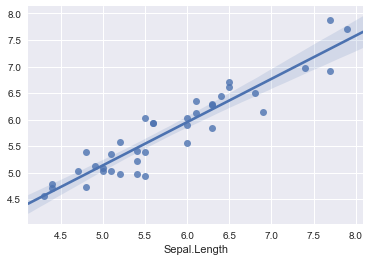

In [50]:
predict3 = lm.predict(x2_test)
#plt.scatter(y2_test,predict3,lw=1,)
sns.regplot(y2_test,predict3)

In [51]:
print(y2_test.shape)
print(predict3.shape)

(38,)
(38,)


In [56]:
r2r = metrics.r2_score(y2_test,predict3)
r2r

0.8710257756111266

In [57]:
rmse2 = np.sqrt(metrics.mean_squared_error(y2_test,predict3))
rmse2

0.33353772488550082

**Conclusion:  we see that the last model r2 is increased and rmse is decreased from the first model that we build so we can accept this last model **

### removing one of the variable causing multicollinearity and then building model.

In [66]:
x2.drop("Petal.Width",axis = 1 , inplace = True)
x2.head()

,Sepal.Width,Petal.Length,Species_versicolor,Species_virginica
0,3.5,1.4,0,0
1,3.0,1.4,0,0
2,3.2,1.3,0,0
3,3.1,1.5,0,0
4,3.6,1.4,0,0


In [67]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size = 0.20,random_state = 43)

In [68]:
lm.fit(x2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
p = lm.predict(x2_test)

In [70]:
print("rmse:",np.sqrt(metrics.mean_squared_error(y2_test,p)))
print("r2:",metrics.r2_score(y2_test,p))

rmse: 0.271195873977
r2: 0.905147980431


### Conclusion: 
1. we see that the model evaluation metrics got better as compared to other previous model. so out of all we can accept this model. we can try other permutation and combination for getting better score than this
1. we cannot be totally dependant on the r2 and rmse because of overfitting anf under filtting concept which we will talk about later.
1. As we all know that tuning of algorithm is a continous process until we achieve our best model , and there are many other factors that are involved.
